<a href="https://colab.research.google.com/github/FarzanaHaider/21DayChallenge-WebDevelopment-/blob/main/Z_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

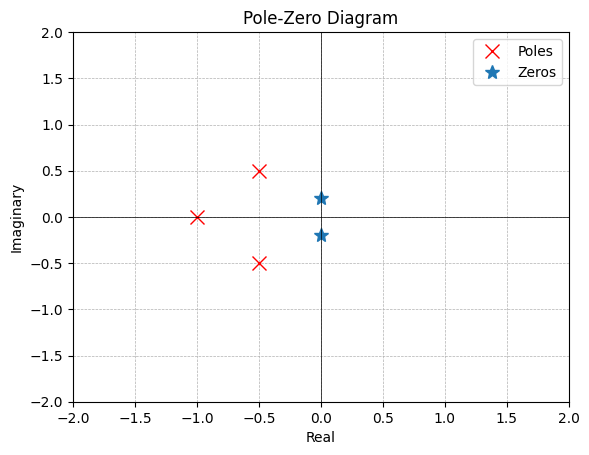

In [ ]:
def plot_pole_zero(poles, zeros):

  fig, ax = plt.subplots()

  #Plotting poles.
  ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles')

  #Plotting Zeros.
  ax.plot(np.real(zeros), np.imag(zeros), '*', markersize=10, label='Zeros')

  #Set Plotting attributes.
  ax.axhline(0, color='black', linewidth=0.5)
  ax.axvline(0, color='black',linewidth=0.5)
  ax.grid(True, which='both', linestyle='--', linewidth=0.5)
  ax.legend()

  ax.set_xlabel('Real')
  ax.set_ylabel('Imaginary')
  ax.set_title('Pole-Zero Diagram')
  #Plotting limits.
  ax.set_xlim([-2,2])
  ax.set_ylim([-2,2])

  plt.show()


poles = [-0.5+0.5j, -0.5-0.5j, -1.0]
zeros  =[0.2j, -0.2j]

plot_pole_zero(poles, zeros)


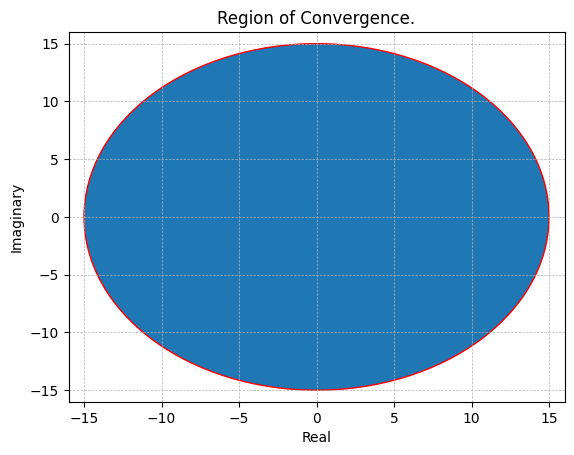

Z-Transformation values...
Z[0]: (15+0j)
Z[1]: (-2.500000000000001+3.4409548011779334j)
Z[2]: (-2.5+0.8122992405822647j)
Z[3]: (-2.499999999999999-0.8122992405822673j)
Z[4]: (-2.4999999999999956-3.440954801177935j)
ROC: |Z| < 15.0


In [ ]:

def Z_Transformation(signal, n):
  N = len(signal)
  Z  = np.zeros(N, dtype=complex)

  for k in range(N):
    Z[k]= np.sum(signal * np.exp(-1j*2*np.pi*n*k/N))

  roc  ='Entire Z-Plane'
  if np.abs(Z).any():
    roc  = 'ROC: |Z| < {}'.format(np.max(np.abs(Z)))

  return Z, roc




signal = [1,2,3,4,5]
n = np.arange(len(signal))

Z, roc = Z_Transformation(signal,n)

#Plotting ROC.
fig, ax  = plt.subplots()
circle = plt.Circle((0,0), radius=np.max(np.abs(Z)), edgecolor='r')
ax.add_patch(circle)
plt.xlim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1 )
plt.ylim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1 )

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Region of Convergence.')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


print('Z-Transformation values...')
for i, z in enumerate(Z):
  print('Z[{}]: {}'.format(i,z))

print(roc)